# Chapter 2: The Postulates Revisited
Prof. Eugene DePrince, Florida State University

Microscopic particles such as electrons and protons behave differently than the macroscopic objects we deal with in every day life. In particular, their motion cannot be described by classical physics (i.e., Newton's equations of motion), and we must rely on a completely different framework in order to understand their properties. That framework is quantum mechanics. With the proper application of quantum-mechanical principles, we can understand and even predict chemical and physical phenomena that cannot be described by classical theories. As chemists, quantum mechanics can be used, among other things, to help us characterize molecular species (using spectroscopic tools like IR, UV-VIS, circular dichroism, near-edge X-ray absorption fine structure [NEXAFS], etc.) or predict chemical properties (using molecular orbital theory or more sophisticated approaches).

This tutorial outlines the postulates of quantum mechanics, which are the fundamental principles that govern how quantum mechanical objects behave and how one can describe these objects mathematically. It also provides some Python code to illustrate some important concepts numerically.

## Preliminaries

### Dirac Notation

Consider a function, $f_n$. In Dirac notation, we write this function as

$$\begin{align}
f_n = |f_n \rangle
\end{align}$$

This function is referred to as a "ket". The complex conjugate of this function is called a "bra":

$$\begin{align}
f_n^* = \langle f_n | 
\end{align}$$

Dirac (or "bracket") notation gives us a compact way to represent integrals over functions and operators. For example,

$$\begin{align}
\langle f_n | f_m \rangle = \int f_n^* f_m d\tau
\end{align}$$

or 

$$\begin{align}
\langle f_n |\hat{A}| f_m \rangle = \int f_n^* \hat{A} f_m d\tau
\end{align}$$

where $\tau$ refers to all space and $\hat{A}$ is an operator. We can see that any time a bra and a key are used together in this way, an integral over all space is implied.

### Well-Behaved Functions

A well-behaved function, $f$ is

- continuous
- single-valued
- square-integrable / finite, which implies that $\langle f | f \rangle \neq \pm \infty$
- smooth, which means that $f$ has a continuous first derivative

We will sometimes use the square-integrable property to infer that a well behaved function $f(x, y, z)$ must go to zero in the limit that $x$, $y$, or $z$ go to $\pm \infty$. 

### Operators

Operators are important objects in quantum mechanics. Mathematically, an operator is a rule that transforms a function into another function. As an example, consider the differential operator, $\frac{d}{dx}$:

$$\begin{align}
\frac{d}{dx}f(x) = f^\prime(x)
\end{align}$$

The operator, $\frac{d}{dx}$, acts on the function, $f(x)$ to give another function, $f^\prime(x)$. As an explicit example, if 

$$\begin{align}
f(x) = x^2 + 3e^x
\end{align}$$

then 

$$\begin{align}
\frac{d}{dx}(x^2 + 3e^x) = 2x + 3e^x
\end{align}$$

In this case, it is clear that the operator $\frac{d}{dx}$ has transformed the function $f(x)$ into a *different* function of $x$. Oftentimes in quantum mechanics we deal with cases in which an operator acts on the function and the function is unchanged, except for a constant value, like

$$\begin{align}
\hat{\Omega} f_i = \omega_i f_i 
\end{align}$$

where $\hat{\Omega}$ is an operator, $f_i$ is a function, and $\omega_i$ is a constant. This equation is an example of an eigenvalue equation. The function, $f_i$, is referred to as an eigenfunction of $\hat{\Omega}$, and $\omega_i$ is the associated eigenvalue. The subscript $i$ is meant to imply that there could be many different eigenfunctions of $\Omega$, with (possibly) different eigenvalues.

> #### Practice
>Which of the following functions are eigenfunctions of $\frac{d}{dx}$? If they are eigenfunctions, what are the associated eigenvalues?
>>Question 1
>>
>>$$\begin{align}
f(x) = e^{ax}
\end{align}$$
>>
>><details>
>><summary>Answer 1</summary> 
>>Well,
>>
>>$$\begin{align}
\frac{d}{dx} e^{ax} = a e^{ax}
\end{align}$$
>>
>>so, yes, $f(x) = e^{ax}$ is an eigenfunction of $\frac{d}{dx}$, and the eigenvalue is $a$.
>></details>
>
>>Question 2
>>
>>$$\begin{align}
f(x) = e^{ax^2}
\end{align}$$
>>
>><details>
>><summary>Answer 2</summary> 
>>
>>Well,
>>
>>$$\begin{align}
\frac{d}{dx} e^{ax^2} = 2 a x e^{ax^2}
\end{align}$$
>>
>>so, no, $f(x) = e^{ax^2}$ is not an eigenfunction of $\frac{d}{dx}$.
>></details>

Operators are defined by how they act on functions, so, when describing properties of operators, it is important to consider the function on which they act. 

**Equality of operators:**

Operators $\hat{A}$ and $\hat{B}$ are equal to one another if they return the same result when acting on the same function, as

$$\begin{align}
\hat{A} f(x) = \hat{B} f(x)
\end{align}$$

**Sums / differences of operators:**

$$\begin{align}
(\hat{A} \pm \hat{B})f(x) = \hat{A}f(x) \pm \hat{B}f(x)
\end{align}$$

**Products of operators:**

$$\begin{align}
\hat{A}\hat{B}f(x) = \hat{A} [ \hat{B}f(x) ]
\end{align}$$

Here, the square brackets are meant to emphasize that the result of the action of operator $\hat{B}$ on $f(x)$ must be evaluated first, followed by the action of operator $\hat{A}$ on the result of $\hat{B}f(x)$. 

**Commutative property:**

When considering products of operators, the order of operations matters. This property of operator algebra differs from regular algebra, where we expect scalar numbers to commute with one another, i.e.,

$$\begin{align}
ab = ba
\end{align}$$

For general operators, $\hat{A}$ and $\hat{B}$, however, $\hat{A}\hat{B}f(x)$ might not equal $\hat{B}\hat{A}f(x)$. For example, consider how products of the operators $\hat{A} = x$ and $\hat{B} = \frac{d}{dx}$ act on a function, $f(x)$. We have

$$\begin{align}
\hat{A}\hat{B}f(x) = x\frac{d}{dx}f(x) = xf^\prime(x)
\end{align}$$

and

$$ 
\begin{align}
\hat{B}\hat{A}f(x) &= \frac{d}{dx}xf(x) \\
&= f(x) + xf^\prime(x)
\end{align}
$$

Clearly, 

$$\begin{align}
xf^\prime(x) \neq f(x) + xf^\prime(x)
\end{align}$$

Put another way,

$$\begin{align}
x\frac{d}{dx} f(x) \neq \frac{d}{dx} x f(x)
\end{align}$$

which implies that

$$\begin{align}
x \frac{d}{dx} \neq \frac{d}{dx} x
\end{align}$$

Note that, in order to say that the operators $x \frac{d}{dx}$ and $\frac{d}{dx} x$ do not equal one another, we *must* consider the action of these operators on a function. Note also that this function should be a function of the same variables that are involved in the operators. 

This example demonstrates that the order of operations can matter in operator algebra. Because the results of $x \frac{d}{dx}$ and $\frac{d}{dx} x$ acting on a function differ, we say that the operators $x$ and $\frac{d}{dx}$ *do not commute*. We will see later that the commutative properties of operators have significant implications in quantum mechanics. 

The commutative properties of operators are described by the commutator

$$\begin{align}
[\hat{A}, \hat{B}] = \hat{A}\hat{B} - \hat{B}\hat{A}
\end{align}$$

In order to evaluate a commutator, you must consider how the commutator acts on a function, as

$$\begin{align}
[\hat{A}, \hat{B}]f(x, y, ...) = \hat{A}\hat{B}f(x, y, ...) - \hat{B}\hat{A}f(x, y, ...)
\end{align}$$

and this function should be a function of the same variables that arrise in the operators. If

$$\begin{align}
[\hat{A}, \hat{B}] = 0 
\end{align}$$

then we say that $\hat{A}$ and $\hat{B}$ commute. If

$$\begin{align}
[\hat{A}, \hat{B}] \neq 0 
\end{align}$$

then we say that $\hat{A}$ and $\hat{B}$ do not commute. 

> #### Practice
>Evaluate the commutators of the following pairs of operators. Which pairs of operators commute?
>>Question 3
>>
>>$$
\begin{align}
\hat{A} &= 3 \\
\hat{B} &= \frac{d}{dx}
\end{align}$$
>>
>><details>
>><summary>Answer 3</summary> 
>>
>>$$ \begin{align}
[\hat{A}, \hat{B}]f(x) &= \hat{A}\hat{B}f(x) - \hat{B}\hat{A}f(x) \\
&= 3\frac{d}{dx}f(x) - \frac{d}{dx} 3f(x) \\
&= 3f^\prime(x) - 3f^\prime(x) \\
&= 0
\end{align}
$$
>>
>>Therefore, the operators $3$ and $\frac{d}{dx}$ commute.
>></details>
>
>>Question 4
>>
>>$$
\begin{align}
\hat{A} &= x \\
\hat{B} &= \frac{d}{dx}
\end{align}$$
>>
>><details>
>><summary>Answer 4</summary> 
>>
>>$$ \begin{align}
[\hat{A}, \hat{B}]f(x) &= \hat{A}\hat{B}f(x) - \hat{B}\hat{A}f(x) \\
&= x\frac{d}{dx}f(x) - \frac{d}{dx} xf(x) \\
&= xf^\prime(x) - f(x) - xf^\prime(x) \\
&= -f(x)
\end{align}
$$
>>
>>Therefore,
>>$$ \begin{align}
[x, \frac{d}{dx}] = -1
\end{align}$$
>>and the operators $x$ and $\frac{d}{dx}$ do not commute.
>></details>

**Powers of Operators**

The square of an operator is simply the product of the operator with itself:

$$\begin{align}
\hat{A}^2 = \hat{A} \hat{A} 
\end{align}$$

More generally, the $n$th power of an operator is

$$\begin{align}
\hat{A}^n = \prod_i^n \hat{A} 
\end{align}$$

The commutator of an operator with any power of itself is zero, so

$$\begin{align}
[\hat{A}^m, \hat{A}^n] = 0
\end{align}$$

**Functions of Operators**

Occasionally in quantum mechanics, we encounter functions of operators, such as $e^{\hat{A}}$. Such an expression can be evaluated using the Taylor series expansion for the function in question. For example,

$$\begin{align}
e^{\hat{A}} = 1 + \hat{A} + \frac{1}{2!}\hat{A}^2 + \frac{1}{3!}\hat{A}^3 + ...
\end{align}$$

Later, when we introduce the concept of a basis and the matrix representations of an operator within a basis, we will discuss a numerical procedure for evaluating functions of operators that does not require the Taylor series expansion.

**Linear Operators**

As we will see shortly, every physical observable has a corresponding linear, Hermitian operator. Linear operators have the following properties

$$\begin{align}
\hat{A}[f(x) + g(x)] = \hat{A}f(x) + \hat{A}g(x)
\end{align}$$

and 

$$\begin{align}
\hat{A}[cf(x)] = c \hat{A}f(x)
\end{align}$$

for any constant, $c$. Examples of linear operators include the differential operator, $\frac{d}{dx}$, and the position operator $x$. Examples of non-linear operators include the square operator, $()^2$, and trigonometric functions such as sin().

**Hermitian Operators**

As mentioned above, quantum mehcanical operators that represent physical observables are Hermitian. For well-behaved functions, $f_m$ and $f_n$, the operator $\hat{\Omega}$ satisfies

$$ \begin{align}
\int f_m^* \hat{\Omega} f_n d\tau = \left ( \int f_n^* \hat{\Omega} f_m d\tau \right )^* = \int f_n \left ( \hat{\Omega} f_m \right) ^* d\tau 
\end{align}$$

or, in Dirac notation, 

$$ \begin{align}
\langle f_m | \hat{\Omega} | f_n \rangle = \langle f_n | \hat{\Omega} | f_m \rangle^*
\end{align}$$

Hermitian operators have a variety of nice properties that we will discuss in detail soon.


## Postulates

### Postulate 1: The Wave Function

In classical mechanics, the state of a system is specified by the positions $\{q_i\}$ and momenta $\{p_i\}$ of all of the particles that make up the system. As we will soon see, it is impossible for one to know both the position and momentum of a quantum mechanical particles simultaneously (this is one manifestation of the Heisenberge uncertainty principle). As such, it is impossible to specify the state of a quantum mechanical system in the same way that the state is specified in classical mechanics. Rather, the state of a quantum mechanical system is specified by the wave function, $\Psi(\{q_i\}, t)$, which is a function of the positions of all of the partitcles that make up the system and time. 

The wave function must be well-behaved. Above, we learned that a well-behaved function should be continuous, single-valued, square integrable (finite), and it should have a continuous first derivative. For the wave function, these properties will generally hold, with two exceptions. First, the requirement of a continuous first derivative is lifted if the potential experienced by the particle is not finite. As an example, consider the interaction between an electron and a proton in a hydrogen atom. The potential experienced by the particles is the Coulomb potential. If the proton's position is fixed at the origin, then this potential can be expressed in terms of the position of the electron, $\vec{r} = (x, y, z)$, i.e.,

$$ \begin{align}
V(\vec{r}) = -\frac{e^2}{4\pi\epsilon_0 |r|}
\end{align}$$

where $e$ is the charge of the electron, $\epsilon_0$ is the permittivity of free space, and $|r| = \sqrt{x^2 + y^2 + z^2}$. This diverges at small $|r|$:

$$ \begin{align}
\lim_{|r|\to 0} V(\vec{r}) = -\infty 
\end{align}$$

As such, the wave function for a hydrogen atom might not be smooth at $|r| = 0$. Indeed, this is the case for the ground-state wave function for the hydrogen atom (a $1s$ orbital), the spatial part of which is

$$\begin{align}
\psi_{1s}(\vec{r}) = N_{1s} e^{-\alpha |r|}
\end{align}$$

where $N_{1s}$ and $\alpha$ are constants. Consider a slice in the $z$ direction, where $x=0$ and $y=0$. Then

$$\begin{align}
\psi_{1s}(0, 0, z) = N_{1s} e^{-\alpha |z|}
\end{align}$$

Let's plot an exponential function like this to get an idea of what the wave function looks like.

Text(0.5, 0, 'z')

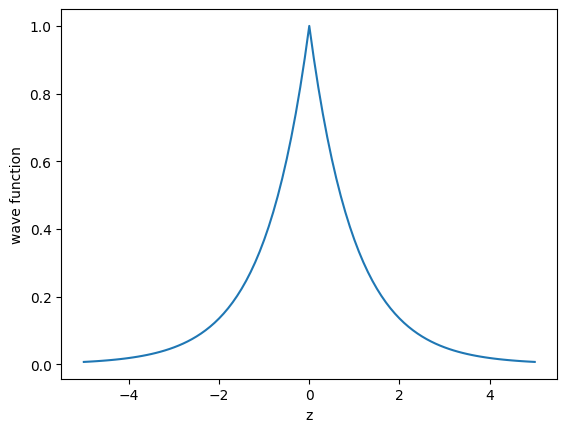

In [1]:
import matplotlib.pyplot as plt
import numpy as np

z = np.arange(-5, 5.1, 0.1)
wfn = np.exp(-np.abs(z))

plt.plot(z, wfn)
plt.ylabel('wave function')
plt.xlabel('z')


It is clear that this function satisfies all of the properties of a well-behaved function, except that the derivative is not smooth at $x = y = z = 0$; the function has a cusp. This situation is acceptable, though, because the potential experienced by the particles is not finite at this point.

The second exception we sometimes encounter is the requirement of square integrability. In general, only "bound" wave functions are square integrable; "unbound" wave functions are not. Bound wave functions describe states where the quantum mechanical particles are localized in some region of space. Unbound wave functions describe states where the quantum mechanical particles are not localized in space. These definitions will become more clear later with specific examples. Regardless, in both cases, the wave function is still required to be finite, even if it is not square integrable.

#### The Born Interpretation of the Wave Function

The wave function, $\Psi(\{q_i\}, t)$ itself does not have any direct physical meaning. The Born interpretation of the wave function states that the square moduluse of the wave function, $|\Psi|^2 = \Psi^* \Psi$, represents a probability distribution, which implies

1. For a single microscopic particle traveling in one dimension, in a state described by the wave function $\Psi(x, t),$ the quantity $|\Psi(x,t)|^2 dx$ is proportional to the probability of finding the particle between $x$ and $x+dx$ at time $t$. For a particle traveling in three dimensions, in a state described by the wave function $\Psi(x, y, z, t),$ the quantity $|\Psi(x, y, z, t)|^2 dx~ dy~ dz$ is proportional the probability of finding the particle in the region $x$ and $x+dx$, $y$ and $y+dy$, and $z$ and $z + dz$.

2. For a single microscopic particle traveling in one dimension, in a state described by the wave function $\Psi(x, t),$ the probabilty of finding the particle between $x=a$ and $x=b$ is proportional to the integral

   $$ \begin{align}
   \int_a^b |\Psi(x, t)|^2 dx
   \end{align}$$

3. The probability of finding the particle anywhere in space should be one. This idea is related to the concept of "normalization." We say that a wave function, $\Psi$ is normalized if

   $$\begin{align}
   \int |\Psi|^2 d\tau = 1
   \end{align}$$

#### Normalizing the Wave Function

A function that is not normalized can be normalized by the following procedure. First, scale the wave function by some constant, $N$,

   $$ \begin{align}
   \Psi \to N\Psi
   \end{align}$$

Second, choose $N$ such that the new wave function is normalized. In which case we have

$$\begin{align}
\int |N\Psi|^2 d\tau &= 1 \\
& = |N|^2 \int |\Psi|^2 d\tau \\
& = N^2 \int |\Psi|^2 d\tau
\end{align}$$

In the third line, we have assumed that $N$ is real valued ($N=N^*$). Now, we simply solve for the normalization constant, $N$:

$$\begin{align}
N = \left ( \frac{1}{\int |\Psi^2| d\tau} \right )^{1/2}
\end{align}$$

and the wave function $N\Psi$ is guaranteed to be normalized. Once the wave function is normalized, we can modify some of the statements given above. For example, for a normalized wave function describing the state of a particle traveling in one dimension, the quantity $|\Psi(x, t)|^2 dx$ is **equal** to the probability of finding the particle between $x$ and $x+dx$. If the wave function is not normalized, then we can only say that $|\Psi(x, t)|^2 dx$ is **proportional** to the probability of finding the particle between $x$ and $x+dx$.

Does normalizing a wave function change anything about the state it represents? No, scaling a wave function by a constant does not change anything about the state that the wave function represents. Put another way, two wave functions that differ by only a constant factor represent the same state. As an example, consider the function 

$$ \begin{align}
f(\phi) = e^{i m \phi}
\end{align}$$

where $m$ is an integer, and $\phi$ is the azimuthal angle in a spherical coordinate representation,

$$ \begin{align}
\vec{r} = (r, \theta, \phi) 
\end{align}$$

with 

$$\begin{align}
0 &\le r < \infty\\ 
0 &\le \theta \le \pi\\ 
0 &\le \phi \le 2 \pi
\end{align}$$

> #### Practice
>> Question 5
>> Is $f(\phi)$ an eigenfunction of the operator $\frac{d}{d\phi}$? If so, what is the eigenvalue?
>><details>
>><summary>Answer 5</summary> 
>>
>>$$ \begin{align}
\frac{d}{d\phi} f(\phi) &= \frac{d}{d\phi} e^{i m \phi} \\
&= im~ e^{i m \phi} \\
&= im~ f(\phi)
\end{align}
$$
>>
>>Therefore, yes, $f(\phi)$ is an eigenfunction of $\frac{d}{d\phi}$, and the eigenvalue is $im$. 
>></details>
>
>> Question 6
>> Normalize $f(\phi)$. What is the normalization constant, $N$?
>><details>
>><summary>Answer 6</summary> 
>>
>>First, scale $f(\phi)$ by a constant, $N$.
>>$$ \begin{align}
f(\phi) \to N f(\phi)
\end{align}$$
>>Now, determine $N$ such that the scaled function is normalized
>>$$
    \begin{align} 
    \int_0^{2\pi} |Nf(\phi)|^2 d\phi &= 1 \\
    &= N^2 \int_0^{2\pi} |f(\phi)|^2 d\phi
    \end{align}
    $$
>>where we have assumed that $N$ is real-valued. Now,
>>$$ 
\begin{align}
N &= \left ( \frac{1}{\int_0^{2\pi} |e^{im\phi}|^2 d\phi} \right )^{1/2}\\
&= \left ( \frac{1}{\int_0^{2\pi} e^{-im\phi} e^{im\phi} d\phi} \right )^{1/2} \\
&= \left ( \frac{1}{\int_0^{2\pi} d\phi} \right )^{1/2} \\
&= \left ( \frac{1}{2\pi} \right )^{1/2}
\end{align}$$
>>
>>The normalization constant is $N = \left (\frac{1}{2\pi}\right)^{1/2}$, and the normalized function is $f(\phi) = \left (\frac{1}{2\pi}\right)^{1/2} e^{im\phi}$.
>></details>
>
>> Question 7
>> Is the normalized function, $N f(\phi)$, an eigenfunction of $\frac{d}{d\phi}$?
>><details>
>><summary>Answer 7</summary> 
>>
>>$$ \begin{align}
\frac{d}{d\phi} f(\phi) &= \frac{d}{d\phi} \left (\frac{1}{2\pi}\right)^{1/2} e^{i m \phi} \\
&= im~ \left (\frac{1}{2\pi}\right)^{1/2} e^{i m \phi} \\
&= im~ f(\phi)
\end{align}
$$
>>
>>Therefore, yes, the normalized function is still an eigenfunction of $\frac{d}{d\phi}$, and the eigenvalue is still $im$. 
>></details>

As these practice problems showed us, normalizing the function $f(\phi)$ does not change the fact that it is an eigenfunction of the operator $\frac{d}{d\phi}$. 

As a more general example, consider a function $f_i$ that is an eigenfunction of a linear operator $\hat{\Omega}$

$$ \begin{align}
\hat{\Omega} f_i = \omega_i f_i
\end{align}$$

If we scale the function by a scalar factor

$$ \begin{align}
f_i \to N f_i 
\end{align}$$

then the new function is still an eigenfunction of $\hat{\Omega}$

$$\begin{align}
\hat{\Omega} (N f_i) &= N \omega_i f_i \\
&= N \omega_i f_i \\
&= \omega_i (N f_i)
\end{align}$$

with the same eigenvalue.

The more general conclusion from these exercises is what was already stated above: normalizing a function that describes a quantum mechanical state does not change anything about the state that it describes. As such, we always have the freedom to normalize the wave functions we encounter. Doing so can simplify both the interpretation of the wave function (e.g., the square modulus is equal to a probability distribution rather than proportional to one) and some of the math that we encounter (integrals that evaluate to one are convenient!). 

### Postulate 2: Operators for Observables

For every physical observable, there exists a corresponding linear Hermitian operator. To find this operator

1. Write down the classical expression for the observable in cartesian coordinates and in terms of linear momenta.
   
2. Replace the cartesian coordinates and linear momenta with the operators
   $$\begin{align}
   \hat{x} &= x \\
   \hat{y} &= y \\
   \hat{z} &= z \\
   \hat{p}_x &= -i\hbar \frac{\partial}{\partial x} \\
   \hat{p}_y &= -i\hbar \frac{\partial}{\partial y} \\
   \hat{p}_z &= -i\hbar \frac{\partial}{\partial z} \\
   \end{align}$$

   Here, $\hbar = \frac{h}{2\pi}$ is the reduced Planck constant.

> #### Practice
>
> Write down the quantum mechanical operators corresponding to the following observables.
>
>> Question 8
>>
>> The kinetic energy for a particle of mass, $m$, moving in one dimension ($x$), $\hat{T}_x$.
>> 
>><details>
>><summary>Answer 8</summary> 
>>
>>The classical expression for $T_x$ is
>>
>>$$\begin{align}
T_x = \frac{p_x^2}{2m}
\end{align}$$
>>
>>Given Rule 2 above, the quantum mechanical operator, $\hat{T}_x$ should be
>>
>> $$ \begin{align}
\hat{T}_x &= \frac{\hat{p}_x^2}{2m} \\
&= \frac{1}{2m} \left (-i\hbar\frac{\partial}{\partial x} \right ) ^2 \\
&= \frac{-\hbar^2}{2m} \frac{\partial^2}{\partial x^2}
\end{align}$$
>></details>
>
>> Question 9
>>
>> The total energy for a particle of mass, $m$, moving in one dimension, subject to the potential $V(x)$.
>>
>><details>
>><summary>Answer 9</summary> 
>>
>> The classical expression for the total energy 
>>
>>$$ \begin{align}
E = \frac{p_x^2}{2m} + V(x)  
\end{align}$$
>>
>> Given Rules 1 and 2 above, the quantum mechanical operator energy operator (the Hamiltonian), $\hat{H}$, should be
>>
>> $$ \begin{align}
\hat{H} &= \hat{T}_x + V(x) \\
&= \frac{-\hbar^2}{2m} \frac{\partial^2}{\partial x^2} + V(x)
\end{align}$$
>></details>
>
>> Question 10
>>
>> The kinetic energy for a particle of mass, $m$, moving in three dimensions.
>>
>><details>
>><summary>Answer 10</summary> 
>>The classical expression for the kinetic energy, $T$, is
>>$$ \begin{align}
T = \frac{1}{2m}\left ( p_x^2 + p_y^2 + p_z^2 \right ) 
\end{align}$$
>>Given Rule 2 above, the quantum mechanical operator, $\hat{T}$ should be
>>
>>$$ 
    \begin{align} 
    \hat{T} &= \frac{1}{2m}\left ( \hat{p}_x^2 + \hat{p}_y^2 + \hat{p}_z^2 \right )  \\
    &= \frac{1}{2m} \left [ \left (-i\hbar \frac{\partial}{\partial x}\right )^2 + \left ( -i\hbar \frac{\partial}{\partial y} \right )^2 + \left ( -i\hbar \frac{\partial}{\partial z} \right ) ^2 \right ] \\
    &= \frac{-\hbar^2}{2m} \left [ \left ( \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} + \frac{\partial^2}{\partial z^2} \right ) \right ] \\
    &= \frac{-\hbar^2}{2m} \nabla^2
    \end{align}$$
>>where $\nabla^2 = \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} + \frac{\partial^2}{\partial z^2}$ is the Laplacian operator.
>></details>
>
>> Question 11
>>
>> The kinetic energy for $N$ particles, moving in three dimensions.
>>
>><details>
>><summary>Answer 11</summary> 
>>The classical expression for the kinetic energy, $T$, is
>>$$ \begin{align}
T = \sum_i^N \frac{1}{2m_i}\left ( p_{x_i}^2 + p_{y_i}^2 + p_{z_i}^2 \right ) 
\end{align}$$
>>Given the result of Question 10, the quantum mechanical operator, $\hat{T}$ should be
>>
>>$$ 
    \begin{align} 
    \hat{T} &= \sum_i^N \frac{1}{2m_i}\left ( \hat{p}_{x_i}^2 + \hat{p}_{y_i}^2 + \hat{p}_{z_i}^2 \right )  \\
    &= \sum_i \frac{-\hbar^2}{2m_i} \nabla_i^2
    \end{align}$$
>>where $m_i$ is the mass of particle $i$, and $\nabla_i^2 = \frac{\partial^2}{\partial x_i^2} + \frac{\partial^2}{\partial y_i^2} + \frac{\partial^2}{\partial z_i^2}$ is the Laplacian operator corresponding to particle $i$.
>></details>

### Postulate 3: Results of Measurements

The only possible values that result from measurement of observable $\Omega$ are the eigenvalues, $\omega_i$, that satisfy

$$ \begin{align}
\hat{\Omega} f_i = \omega_i f_i 
\end{align}$$

where $\hat{\Omega}$ is the linear Hermitian operator corresponding to obvervable, $\Omega$, and $f_i$ are well-behaved functions. The fact that $\hat{\Omega}$ is Hermitian has important implications for this postulate. Recall that, for well-behaved functions $f_m$ and $f_n$ and Hermitian operator $\hat{A}$

$$ 
\begin{align}\langle f_m | \hat{A} | f_n \rangle = \langle f_n | \hat{A} | f_m \rangle^*
\end{align}$$

#### Properties of Hermitian Operators

Now, consider the case where $f_m = f_n$ and $f_n$ is an eigenfunction of $\hat{A}$, i.e., 

$$ 
\begin{align}
\hat{A} f_n = a_n f_n
\end{align}$$

In this case, we have

$$ 
\begin{align}
\langle f_n | \hat{A} | f_n \rangle &= \langle f_n | \hat{A} | f_n \rangle^* \\
\langle f_n | a_n | f_n \rangle &= \langle f_n | a_n | f_n \rangle^* \\
a_n \langle f_n | f_n \rangle &= a_n^* \langle f_n | f_n \rangle^* \\
a_n \langle f_n | f_n \rangle &= a_n^* \langle f_n | f_n \rangle \\
a_n &= a_n^*
\end{align}$$
Therefore, $a_n$ must be real-valued. We have just proved a theorem related to the eigenvalues of Hermitian operators.

**Theorem 1**: The eigenvalues of Hermitian operators are real-valued.

This result has important physical consequences. Postulate 3 states that the only possible values that result from measurement of observable $\Omega$ are the eigenvalues of the operator $\hat{\Omega}$. Because $\hat{\Omega}$ must be Hermitian, the eigenvalues of this operator must be real. This result makes sense since the outcome of any measurement must be real-valued.

The eigenfunctions of Hermitian operators also have some nice properties. Let us prove the following theorem:

**Theorem 2**: The eigenfunctions of Hermitian operators with different eigenvalues or orthogonal.

Let us consider an operator $\hat{B}$, with eigenfunctions that satisfy 

$$ \begin{align}
\hat{B} g_i = b_i g_i
\end{align}$$

If eigenfunctions $g_i$ and $g_j$ are orthogonal, then they should satisfy

$$ \begin{align}
\langle g_i | g_j \rangle  = 0 ~~~~\text{(if $i\neq j$)}
\end{align}$$

**Proof**:

Consider two eigenfunctions of $\hat{B}$, $g_i$ and $g_j$, with eigenvalues $b_i\neq b_j$. Since $\hat{B}$ is Hermitian, the following relationship should hold

$$ \begin{align}
\langle g_i | \hat{B} | g_j \rangle &= \langle g_j | \hat{B} | g_i \rangle^* \\
\langle g_i | b_j | g_j \rangle &= \langle g_j | b_i | g_i \rangle^* \\
b_j \langle g_i| g_j \rangle &= b_i^* \langle g_j| g_i \rangle^* \\
b_j \langle g_i| g_j \rangle &= b_i \langle g_i| g_j \rangle \\
(b_j - b_i)\langle g_i| g_j \rangle &= 0
\end{align}$$
where, in the second-to-last line, we have used the fact that $b_i = b_i^*$, as proved above. The last line can be satisfied if

$$\begin{align}
b_i = b_j
\end{align}$$
or
$$\begin{align}
\langle g_i | g_j \rangle = 0
\end{align}$$

We reject the first option because because $b_i \neq b_j$ by definition. Hence, $\langle g_i | g_j \rangle = 0 $. 

If two functions are orthogonal, we often say that they have zero overlap. The following example illustrates the orthogonality of wave functions for a hydrogen atom. Recall that the lowest-energy wave function (a $1s$ orbital) looks like

$$\begin{align}
\psi_{1s}(\vec{r}) = N_{1s} e^{-\alpha |r|}
\end{align}$$

The $2p_z$ orbital is the wave function for a higher-energy state (an excited state) and has the form

$$\begin{align}
\psi_{2p_z}(\vec{r}) = N_{2p_z} z e^{-\alpha |r|/2}
\end{align}$$

If, like above, we consider the slice along the $z$-axis where $x=y=0$, then we have 

$$\begin{align}
\psi_{1s}(0, 0, z) = N_{1s} e^{-\alpha |z|}
\end{align}$$

and

$$\begin{align}
\psi_{2p_z}(0, 0, z) = N_{2p_z} z e^{-\alpha |z|/2}
\end{align}$$

Let us visualize these wave functions with Python.

Text(0.5, 0, 'z')

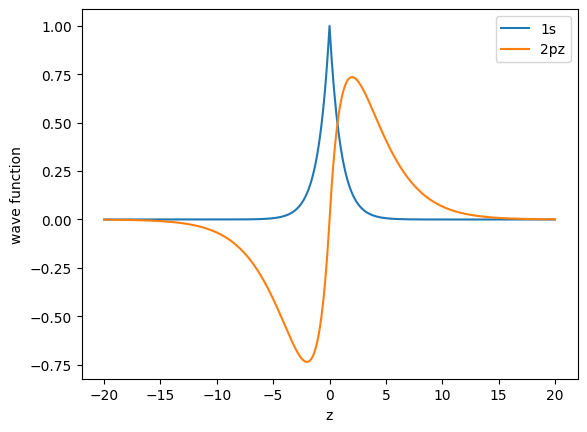

In [2]:
z = np.arange(-20, 20.1, 0.1)
wfn_1s = np.exp(-np.abs(z))
wfn_2pz = z * np.exp(-np.abs(z)/2.0)

plt.plot(z, wfn_1s, label='1s')
plt.plot(z, wfn_2pz, label='2pz')
plt.legend()
plt.ylabel('wave function')
plt.xlabel('z')

Clearly, $\psi_{1s}$ and $\psi_{2p_z}$ are even and odd functions in $z$, respectively. For this reason, the integral of their product over the $z$-direction will be zero, and, thus

$$\begin{align}
\langle \psi_{1s} | \psi_{2p_z} \rangle = \int_{-\infty}^{\infty} dx \int_{-\infty}^{\infty} dy \int_{-\infty}^{\infty} dz ~\psi_{1s}^*(x, y, z) \psi_{2p_z}(x, y, z) = 0 
\end{align}$$

We can use Python to verify that the integral over the $z$-direction is indeed zero.

In [3]:
# integrate <psi_1s|psi_2pz> using the trapezoid rule
overlap = np.trapz(wfn_1s.conj() * wfn_2pz, z)

print('The overlap of the 1s and 2pz orbitals is %15.12f' % (overlap))

The overlap of the 1s and 2pz orbitals is  0.000000000000


Now, let's continue to explore the properties of Hermitian operators. We proved above that eigenfunctions of a Hermitian operator that have different eigenvalues must be orthogonal. What if the eigenvalues are the same?

**Theorem 3** Two eigenfunctions of a linear Hermitian operator corresponding to degenerate eigenvalues (having the same value) can be chosen to be orthogonal. 

Consider two functions, $F$ and $G$, that are eigenfunctions of the operator, $\hat{B}$, with the same eigenvalue, $b$. That is

$$\begin{align}
\hat{B} F &= b F \\
\hat{B} G &= b G
\end{align}$$

We can define two new eigenfunctions, $g_1$ and $g_2$, that are, by definition, orthogonal and have the same eigenvalue. We take

$$ \begin{align}
g_1 &= F \\
g_2 &= G + c F 
\end{align} $$

where $c$ is a constant chosen such that $\langle g_1 | g_2 \rangle = 0$.

We have 

$$ \begin{align}
\langle g_1 | g_2 \rangle &= 0 \\
&= \langle F | G + c F\rangle \\
&= \int F^* ( G + c F) d\tau \\
&= \int F^* Gd\tau + c\int F^* F d\tau \\
& = \langle F | G \rangle + c \langle F | F \rangle
\end{align}$$

Solving for $c$ gives us

$$ \begin{align}
c = - \frac{\langle F | G \rangle}{\langle F | F \rangle} 
\end{align}$$

which is just a number. Now, our orthogonal functions are

$$ \begin{align}
g_1 &= F \\
g_2 &= G - \frac{\langle F | G \rangle}{\langle F | F \rangle} F 
\end{align} $$

We should verify that these new functions are still eigenfunctions of $\hat{B}$ and that the eigenvalues have not changed. For $g_1$, this is trivial to show:

$$ \begin{align}
\hat{B} g_1 &= \hat{B} F \\
&= b F \\
&= b g_1
\end{align} $$

For $g_2$, we have

$$ \begin{align}
\hat{B} g_2 &= \hat{B} (G + c F) \\
&= \hat{B} G + \hat{B} c F \\
&= \hat{B} G + c \hat{B} F \\
&= b G + c b F \\
&= b (G + c F) \\
&= b g_2
\end{align} $$

where, in the second and third lines, we have used the fact that $\hat{B}$ is a linear operator. Thus, we can state a corollary to theorem 3:

**Corollary 1**: Linear combinations of degenerate eigenfunctions of linear Hermitian operators are still eigenfunctions of the operator, with the same eigenvalues.

A related corollary is

**Corollary 2**: Linear combinations of eigenfunctions of linear Hermitian operators with different eigenvalues may not be eigenfunctions of that operator. 

> #### Practice
As a simple example of Corollary 2, consider two eigenfunctions of a linear Hermitian operator, $\hat{A}$, whose eigenvalues differ by a sign:
$$\begin{align}
\hat{A} h_+ &= +a h_+ \\
\hat{A} h_- &= -a h_-
\end{align}$$
>>Question 12: Is the function $(h_+ + h_-)$ and eigenfunction of $\hat{A}$?
>>
>><details>
>><summary>Answer 12</summary> 
>>
>>Consider the action of $\hat{A}$ on $(h_+ + h_-)$:
>>$$
    \begin{align}
    \hat{A}(h_+ + h_-) &= \hat{A}h_+ + \hat{A}h_- \\
      &= ah_+ + (-a)h_- \\
      &= a ( h_+ - h_-)
    \end{align}$$
>>Because $(h_+ + h_-) \neq ( h_+ - h_-)$, we can say that $(h_+ + h_-)$ is not an eigenfunction of $\hat{A}$.
>></details> 



#### Gram-Schmidt Orthogonalization

The orthogonalization procedure demonstrated above for the degenerate functions $F$ and $G$ is called Gram-Schmidt orthogonalization, and it is generalizable to $n$ degenerate eigenfunctions (with $n > 2$) to give $n$ orthogonal, linearly independent functions.

If $\{f_i\}$ is a set of linearly independent, non-orthogonal functions, then a set of linearly independent, orthogonal functions $\{g_i\}$ can be generated according to

$$\begin{align}
|g_i\rangle = |f_i\rangle - \sum_j^{i-1} \frac{\langle f_i | g_j \rangle}{\langle g_j | g_j \rangle} | g_j \rangle
\end{align}$$

More explicitly, we have

$$\begin{align}
|g_0\rangle &= |f_0\rangle \\
|g_1\rangle &= |f_1\rangle - \frac{\langle f_1 | g_0\rangle}{\langle g_0 | g_0 \rangle} |g_0\rangle \\
|g_2\rangle &= |f_2\rangle - \frac{\langle f_2 | g_0\rangle}{\langle g_0 | g_0 \rangle} |g_0\rangle - \frac{\langle f_2 | g_1\rangle}{\langle g_1 | g_1 \rangle} |g_1\rangle \\
... & \nonumber
\end{align}$$

Based on Theorems 2 and 3 defined above, the eigenfunctions of Hermitian operators are either already orthogonal to one another, or they can be chosen such that they are orthogonal. We have also seen while discussing Postulate 1 that we are always free to normalize functions, and normalizing them does not change their properties. As such, unless otherwise noted, we often assume that eigenfunctions of Hermitian operators are orthonormalized. A set of orthonormal functions, $\{g_i\}$, satisfies

$$ \begin{align}
\langle g_i | g_j \rangle = \delta_{ij} =
\begin{cases}
    1, & \text{if } i = j\\
    0, & \text{otherwise}
\end{cases}
\end{align}$$

where $\delta_{ij}$ is the Kronecker delta function.

We will soon develop Python code to orthogonalize a set of non-orthogonal functions using the Gram-Schmidt procedure, but, first, it will be useful to learn a little bit more about the eigenfunctions of Hermitian operators and the properties of sets of orthonormal functions. 

### Postulate 4: Eigenfunctions Form a Complete Set

If $\hat{B}$ is a linear Hermitian operator that represents a physical observable property, then the eigenfunctions, $g_i$, that satisfy

$$\begin{align}
\hat{B} g_i = b_i g_i
\end{align}$$

form a complete set. This completeness means that these eigenfunctions completely span the space in which the operator is represented. As a result, we can expand the wave function for any state as a superposition or linear combination of these eigenfunctions (as long as the wave function satisfies the same boundary conditions as the eigenfunctions). Mathematically, we have

$$ \begin{align}
|\psi\rangle = \sum_i c_i | g_i \rangle
\end{align}$$

where $c_i$ is an expansion coefficient and $g_i$ is referred to as a basis function. We say that the set of functions $\{g_i\}$ form the basis in which $\psi$ is expanded. 

How does one determine the expansion coefficients, $c_i$? Assuming that the basis functions, $\{g_i\}$, are orthonormalized, we can determine $c_i$ by projecting $\psi$ onto the associated basis function as

$$ \begin{align}
\langle g_i | \psi \rangle &= \langle g_i | \sum_j c_j g_j \rangle \\
&= \sum_j c_j \langle g_i | g_j \rangle \\
&= \sum_j c_j \delta_{ij} \\
&= c_i
\end{align}$$

where, in the third line, we used the fact that $\langle g_i | g_j \rangle = \delta_{ij}$, and in the fourth line, because of the Kronecker delta function, the only term that survived the sum is the one where $i=j$. From this simple exercise, we see that the expansion coefficients are defined by

$$ \begin{align}
c_i = \langle g_i | \psi \rangle
\end{align}$$

Reinserting this definition into the original expansion for $\psi$, we have

$$\begin{align}
|\psi\rangle &= \sum_i c_i | g_i \rangle \\
&= \sum_i \langle g_i | \psi \rangle | g_i \rangle \\
&= \sum_i | g_i \rangle \langle g_i | \psi \rangle
\end{align}$$

where we have now stumbled upon a very useful operator, the identity or unit operator ($\hat{I}$ or $\hat{1}$), which is defined by

$$ \begin{align}
\hat{I} = \sum_i | g_i \rangle \langle g_i | 
\end{align}$$

Note one subtlety of the identity operator is that this equality only holds if the basis set is complete. 

### Postulate 5: The Expectation Value

If $\Psi(\vec{q}, t)$ is a normalized wave function representing the state of a quantum mechanical systet at time, $t$, then the *average* value of a physical observable, $B$, at time, $t$, is given by the "expectation value"

$$ \begin{align}
\langle B \rangle = \langle \Psi | \hat{B} | \Psi \rangle
\end{align}$$

If $\Psi(\vec{q}, t)$ is not normalized, then the expectation value is 

$$ \begin{align}
\langle B \rangle = \frac{\langle \Psi | \hat{B} | \Psi \rangle}{\langle \Psi | \Psi \rangle}
\end{align}$$

The expectation value is an average value for the observable, $B$, accumulated after many measurements of $B$ that are carried out on idential systems. Recall, Postulate 3 states that the result of any measurement of observable $B$ will result in one of the eigenvalues of $\hat{B}$ that satisfy

$$ \begin{align}
\hat{B}|g_i \rangle = b_i |g_i \rangle
\end{align}$$

where $b_i$ is the eigenvalue and $g_i$ is the associated eigenfunction. Unfortunately, except in certain circumstances that will be discussed soon,  we do not generally know ahead of time which eigenvalue of $\hat{B}$ we will observe. However, if we know the wave function, we can at least calculate the expected result of many averaged measurements - this quantity is what the the expectation value represents.

In order to draw some meaning from these expressions, first recall that Postulate 4 states that the eigenfunctions of $\hat{B}$ form a complete set, so we can expand $\Psi$ in terms of its eigenfunctions as

$$ \begin{align}
|\Psi \rangle = \sum_i c_i |g_i\rangle
\end{align}$$

We will assume that the eigenfunctions of $\hat{B}$ are orthonormalized. Given this expansion for the wave function, let's evaluate the expecation value, using 

$$ \begin{align}
\langle B \rangle = \frac{\langle \Psi | \hat{B} | \Psi \rangle}{\langle \Psi | \Psi \rangle}
\end{align}$$

First, consider the denominator, 

$$\begin{align}
\langle \Psi | \Psi \rangle &= \langle \sum_i c_i g_i | \sum_j c_j g_j \rangle \\
&= \sum_{ij} c_i^* c_j \langle g_i | g_j \rangle \\
&= \sum_{ij} c_i^* c_j \delta_{ij} \\
&= \sum_{i} c_i^* c_i \\
&= \sum_i |c_i|^2
\end{align}
$$

For simplicity, let's assume that the wave function is already normalized, in which case

$$ \begin{align}
\langle \Psi | \Psi \rangle = \sum_i |c_i|^2 = 1
\end{align}$$

Now, consider the numerator,

$$ \begin{align}
\langle \Psi | \hat{B} | \Psi \rangle &= \langle \sum_i c_i g_i |\hat{B}| \sum_j c_j g_j \rangle \\
&= \sum_{ij} c_i^* c_j \langle g_i | \hat{B} | g_j \rangle \\
&= \sum_{ij} c_i^* c_j \langle g_i | b_j | g_j \rangle \\
&= \sum_{ij} c_i^* c_j b_j \langle g_i | g_j \rangle \\
&= \sum_{ij} c_i^* c_j b_j \delta_{ij} \\
&= \sum_{i} |c_i|^2 b_i
\end{align}$$

In the third line, we made use of the fact that $g_j$ is an eigenfunction of $\hat{B}$, with eigenvalue $b_j$. Now, it appears that the expectation value is a weighted sum of the eigenvalues of $\hat{B}$. 

Again, from Postulate 3, we know that the result of a measurement of observable $B$ will be one of the eigenvalues of the operator, $\hat{B}$. Now, we also know that, after infinitely many measurements on identical systems, we can build up an average value for $B$ that is expressible as a weighted sum of eigenvalues of $\hat{B}$. The weights in the average ($|c_i|^2$) are interpreted as the probability that we will observe the eigenvalue $b_i$ on any given measurement. For this reason, the expansion coefficients, $c_i$, are often referred to as "probability amplitudes." Recall that, for a normalized wave function, 

$$ \begin{align}
\sum_i |c_i|^2 = 1 
\end{align}$$

The fact that all $|c_i|^2$ sum to one is consistent with the interpretation of $|c_i|^2$ as a probality. 

What happens to the expectation value if $\Psi$ is equal to a single, normalized eigenfunction of $\hat{B}$? In this case

$$\begin{align}
|\Psi\rangle &= |g_k \rangle
\end{align}$$

Now, we have 
$$\begin{align}
\langle B \rangle &= \langle \Psi | \hat{B} | \Psi \rangle \\
&= \langle g_k | \hat{B} | g_k \rangle \\
&= \langle g_k | b_k | g_k \rangle \\
&= b_k\langle g_k | g_k \rangle \\
&= b_k
\end{align}$$

In this case, the expectation value is exactly equal to only one of the eigenvalues of $\hat{B}$, which implies that the only result of any measurement of $B$ will be $b_k$. 

**Corollary**: If the wave function for a state is an eigenfunction of an operator representing a physical observable, $\hat{B},$ then the state has a definite value of the corresponding observable, $B$. 

### Postulate 6: The Time-Dependent Schrödinger Equation

Time time-evolution of an isolated quantum system is governed by the time-dependent Schrödinger equation (TDSE):

$$ \begin{align}
i\hbar \frac{\partial}{\partial t} | \Psi(\vec{q}, t) \rangle = \hat{H} | \Psi(\vec{q}, t) \rangle
\end{align}$$

where $\hat{H} = \hat{T} + \hat{V}(\vec{q}, t)$ is the Hamiltonian operator (the energy operator), $\hat{T}$ is the kinetic energy operator, and $\hat{V}(\vec{q}, t)$ is the potential energy operator, which may or may not depend on time. The TDSE is the quantum mechanical analogue of Newton's second law or Hamilton's equations in classical mechanics. A crucial difference between the quantum mechanical and classical equations of motion is that, in the quantum mechanical case, we can only predict probabilities of outcomes of measurements. 

If the Hamiltonian is independent of time (in the absence of any time-varying external fields), then the TDSE is separable in the sense that, the operators on the left-hand size of the equation involve time, while the operators on the right-hand side depend only on the spatial coordinates of the particles. In such a situation, we can use a mathematical technique known as "separation of variables" to state

$$ \begin{align}
\Psi(\vec{q}, t) = \psi(\vec{q}) \phi(t)
\end{align}$$

That is, the wave function is separable into a product of a spatial component ($\psi$) and a temporal component ($\phi$). If the Hamiltonian does not depend on time then factorizing the wave function in this way is not an approximation.

Let us consider a particle of mass $m$ moving in one-dimension, subject to a time-independent potential. The Hamiltonian for such a system is time-independent, so we are free to factorize the wave function as above

$$ \begin{align}
\Psi(x, t) = \psi(x) \phi(t)
\end{align}$$

Now, we can insert this definition for $\Psi(x,t)$ into the TDSE 

$$ \begin{align}
i\hbar \frac{\partial}{\partial t} \psi(x) \phi(t) &= \hat{H} \psi(x) \phi(t) \\
i\hbar \psi(x) \frac{\partial}{\partial t} \phi(t) &= \phi(t) \hat{H} \psi(x)
\end{align}$$

where, on the second line, we have moved the functions on which the operators do not act to the left of the operators. Now, left-multiply both sides of the equation by $\frac{1}{\psi(x)\phi(t)}$ 

$$ \begin{align}
\frac{1}{\psi(x)\phi(t)}\left [ i\hbar  \psi(x) \frac{\partial}{\partial t} \phi(t) = \frac{1}{\psi(x)\phi(t)}\phi(t) \hat{H} \psi(x) \right ]\\
\end{align}$$

and we can cancel terms with $\psi(x)$ on the left-hand side and terms with $\phi(t)$ on the right-hand side leaving


$$\begin{align}
i\hbar \frac{1}{\phi(t)} \frac{\partial}{\partial t} \phi(t) = \frac{1}{\psi(x)} \hat{H} \psi(x)
\end{align}$$

Now, all of the temporal variables are isolated on the left-hand side, and the spatial variables are isolated on the right-hand side. Now, think about holding $t$ fixed and varying $x$. The left-hand side must be constant because time is fixed, which implies that the right-hand side is equal to a constant for all $x$. Next, think about holding $x$ fixed and varying $t$. The right-hand side must be constant because position is fixed, which implies that the left-hand side is equal to a constant for all $t$. So, we can set both sides equal to a constant, which we will call $E$ (for energy, since the right-hand side has units of energy), giving

$$\begin{align}
i\hbar \frac{1}{\phi(t)} \frac{\partial}{\partial t} \phi(t) = \frac{1}{\psi(x)} \hat{H} \psi(x) = E
\end{align}$$

We now have two separate equations involving this constant that we could solve. First, consider the temporal part. We have

$$\begin{align}
\frac{\partial}{\partial t} \phi(t) = \frac{-i E}{\hbar} \phi(t)
\end{align}$$

which is a first-order ordinary differential equation (ODE) with a solution 

$$\begin{align}
\phi(t) = e^{-iEt / \hbar}
\end{align}$$

Now, consider the spatial part, which has the form of an eigenvalue problem

$$\begin{align}
\hat{H} \psi(x) = E \psi(x)
\end{align}$$

This equation is the time-independent Schrödinger equation (TISE). Much of the following notebooks will be dedicated to finding analytic or numerical solutions to the TISE for various problems. 

Given Postulate 4, we are free to expand any spatial wave function in terms of the eigenfunctions of the Hamiltonian

$$\begin{align}
\hat{H} \psi_n(\vec{q}) = E_n \psi_n(\vec{q})
\end{align}$$

where we have introduced the subscript $n$ to emphasize that there are multiple solutions to this equation, or, in other words, that $\hat{H}$ has multiple eigenfunctions. Based on the discussion in the last section, if the spatial wave function is exactly equal to one of the eigenfunctions, $\psi_n$, then the associated state has a well-defined (or fixed) energy, $E_n$. If the wave function is not an eigenfunction of the Hamiltonian, then we cannot make such a statement, but we should still be able to evaluate the expectation value of the energy, which we would expect to be a weighted average of the eigenvalues, $E_n$. 

For a state with a definite value of the energy, the total wave function is

$$\begin{align}
\Psi_n(\vec{q}, t) = e^{-iE_nt/\hbar} \psi_n(\vec{q})
\end{align}$$

What is the probability distribution, $|\Psi|^2$? We have

$$\begin{align}
|\Psi_n(\vec{q}, t)|^2 &= |e^{-iE_nt/\hbar} \psi_n(\vec{q})|^2 \\
&= e^{iE_nt/\hbar}e^{-iE_nt/\hbar} |\psi_n(\vec{q})|^2 \\
&= |\psi_n(\vec{q})|^2
\end{align}$$

which is independent of time! We refer to such a state a "stationary state." This name does not imply that the particles themselves are stationary. Rather, the probability density is stationary in time.

What if the wave function is not a stationary state? Well, by Postulate 4, we could expand the spatial part of any wave function as 

$$ \begin{align}
\psi(\vec{q}) = \sum_i c_i \psi_i(\vec{q}) 
\end{align}$$

where $\psi_i$ are eigenfunctions of the Hamiltonian with energy, $E_i$. Similarly, a general total wave function can be expanded in the basis of stationary states, $\Psi_k$, as

$$ \begin{align}
\Psi(\vec{q}, t) &= \sum_k c_k \Psi_k(\vec{q}, t) \\
&=  \sum_k c_k e^{-iE_kt/\hbar} \psi_k(\vec{q})
\end{align}$$

What is the probability distribution, $|\Psi|^2$, for a non-stationary state?

$$\begin{align}
|\Psi(\vec{q}, t)|^2 &= |\sum_k c_k \Psi_k(\vec{q}, t)|^2 \\
&= |\sum_k c_k e^{-iE_kt/\hbar} \psi_k(\vec{q})|^2
\end{align}$$

Unlike for the stationary state, the time-dependent parts of $|\Psi|^2$ for the non-stationary state will not cancel, in general, so the probability distribution varies in time. This time-dependence is the reason such a state is referred to as non-stationary.

The following code demonstrates the time evolution of stationary and non-stationary states using eigenfunctions of the Hamiltonian for the "particle-in-a-box" problem, which is a model problem that we will explore in detail in the next notebook. For now, we simply take the spatial parts of the PIB wave functions to have the form

$$\begin{align}
\psi_n(x) = 
\begin{cases}
    0, & x < 0 \\
    \left ( \frac{2}{l} \right ) ^{1/2} \text{sin}\left (\frac{n\pi x}{l} \right ), & 0 \le x \le l \\
    0, & x > l \\
\end{cases}
\end{align}$$

where $l$ is the width of the box in which the particle resides, and $n=1,2,3...$.

The energy associated with each PIB state is

$$\begin{align}
E_n = \frac{\hbar^2\pi^2n^2}{2ml^2}
\end{align}$$

where $m = m_e$ is the mass of the particle, which we take to be an electron. We will consider the time evolution of probability densities and the real and imaginary components of the stationary states, $\Psi_1$ and $\Psi_2$, as well as the same quantities for the non-stationary state $\frac{1}{2^{1/2}}(\Psi_1 + \Psi_2)$. For simplicity, we will work with "atomic units", which have $\hbar = 1$, and $m_e = 1$. We will also take $l = 1 a_0$, where $a_0$ is the "bohr", the atomic unit for distance.

RuntimeError: Requested MovieWriter (ffmpeg) not available

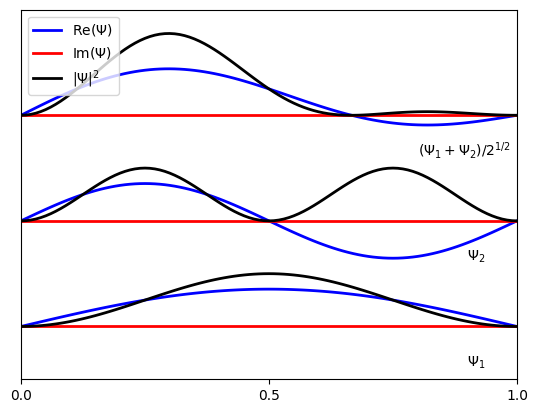

In [4]:
fig = plt.figure()

# lists of 2d line objects ... each frame will be an element in the list
line1, = plt.plot([], [], color = 'blue', lw=2)  # Re(1)
line2, = plt.plot([], [], color = 'red', lw=2)   # Im(1)
line3, = plt.plot([], [], color = 'black', lw=2) # |1|^2
line4, = plt.plot([], [], color = 'blue', lw=2)  # Re(2)
line5, = plt.plot([], [], color = 'red', lw=2)   # Im(2)
line6, = plt.plot([], [], color = 'black', lw=2) # |2|^2
line7, = plt.plot([], [], color = 'blue', lw=2, label = r'Re$(\Psi)$')  # Re(1+2)
line8, = plt.plot([], [], color = 'red', lw=2, label = r'Im$(\Psi)$')   # Im(1+2)
line9, = plt.plot([], [], color = 'black', lw=2, label = r'$|\Psi|^2$') # |1+2|^2

# add some labels for each state
plt.annotate(r'$\Psi_1$', xy = [0.9, -1.5])
plt.annotate(r'$\Psi_2$', xy = [0.9, 2.5])
plt.annotate(r'$(\Psi_1 + \Psi_2)/2^{1/2}$', xy = [0.8, 6.5])

# figure details
plt.xlim(0, 1)
plt.ylim(-2, 12)
plt.xticks(ticks=[0.0, 0.5, 1.0])
plt.yticks(ticks=[])
plt.legend(loc='upper left')

# mass, length of box, hbar
me = 1
l = 1
hbar = 1

# energies for states with n=1 and n=2
E_1 = hbar**2 * np.pi**2 * 1**2 / (2 * me * l**2)
E_2 = hbar**2 * np.pi**2 * 2**2 / (2 * me * l**2)

# how many time steps do we need for one oscillation of Re(psi_1)?
# number of time steps = period of oscillation / dt 
dt = 0.01
time_steps = int(2.0 * np.pi / E_1 / dt)

# x-range over which we would like to visualize the states
x = np.arange(0, 1.01, 0.01)

# spatial parts of the wave functions with n=1 and n=2
psi_1_spatial = np.sqrt(2.0) * np.sin(1 * np.pi * x / l)
psi_2_spatial = np.sqrt(2.0) * np.sin(2 * np.pi * x / l)

# animation function
def stationary_states(n):

    # current time
    time = n * dt

    # total, time-dependent wave functions
    psi_1 = psi_1_spatial * np.exp(-1j * E_1 * time / hbar)
    psi_1_prob = np.abs(psi_1)**2
    
    psi_2 = psi_2_spatial * np.exp(-1j * E_2 * time / hbar)
    psi_2_prob = np.abs(psi_2)**2
    
    psi_12 = 1.0 / np.sqrt(2.0) * (psi_1 + psi_2)
    psi_12_prob = np.abs(psi_12)**2

    # a shift for visualizing the wave functions in a stack
    shift = 4

    line1.set_data(x, psi_1.real)
    line2.set_data(x, psi_1.imag)
    line3.set_data(x, psi_1_prob)
    
    line4.set_data(x, psi_2.real + shift)
    line5.set_data(x, psi_2.imag + shift)
    line6.set_data(x, psi_2_prob + shift)
    
    line7.set_data(x, psi_12.real + 2 * shift)
    line8.set_data(x, psi_12.imag + 2 * shift)
    line9.set_data(x, psi_12_prob + 2 * shift)
    
    return (line1, line2, line3, line4, line5, line6, line7, line8, line9)

from matplotlib import animation

anim = animation.FuncAnimation(fig, stationary_states, frames=time_steps, interval=30, blit=True)

from IPython.display import HTML
HTML(anim.to_html5_video())

We can make several observations from this animation. First, as expected, the probability density ($|\Psi|^2$) is constant in time for the two stationary states, $\Psi_1$ and $\Psi_2$. Second, the non-stationary state, $\frac{1}{2^{1/2}}(\Psi_1 + \Psi_2),$ has a time-dependent probability density, which, again, is expected. The real and imaginary components of the wave functions for both the stationary and non-stationary states oscillate in time, and the oscillations are more rapid for $\Psi_2$ than $\Psi_1$. This result makes sense because, given the temporal part of the wave function, the frequency of these oscillations should be $E_n / (2 \pi)$, and $E_2 > E_1$.

> #### Practice
> Consider a non-stationary state of the form
> $$ \begin{align}
\Psi(\vec{q}, t) = \sum_k c_k e^{-iE_kt/\hbar} \psi_k(\vec{q})
\end{align}$$
> 
>>Question 13: Does this state have a definite energy?
>>
>><details>
>><summary>Answer 13</summary> 
>>
>>No! When measuring the energy of this state, the probability of observing $E_k$ is proportional to (or equal to if $\Psi$ is normalized) 
$$\begin{align}
|c_k e^{-iE_kt/\hbar}|^2 = |c_k|^2
\end{align}$$
>></details> 
>
>>Question 14: For this state, does the expectation value of the energy depend on time?
>>
>><details>
>><summary>Answer 14</summary> 
>>
>>Assuming that the wave function is normalized, i.e., $\langle \Psi | \Psi \rangle = 1$, the expectation value of the energy is
$$\begin{align}
\langle E \rangle &= \langle \Psi | \hat{H} | \Psi \rangle \\
&= \langle \sum_j c_j e^{-iE_jt/\hbar}\psi_j | \hat{H} | \sum_k c_k e^{-iE_kt/\hbar}\psi_k \rangle \\
&= \sum_{jk} c_j^*c_k e^{iE_jt/\hbar} e^{-iE_kt/\hbar} \langle \psi_j |\hat{H}|\psi_k\rangle \\
&= \sum_{jk} c_j^*c_k e^{i(E_j-E_k)t/\hbar} E_k \langle \psi_j |\psi_k\rangle \\
&= \sum_{jk} c_j^*c_k e^{i(E_j-E_k)t/\hbar} E_k \delta_{jk} \\
&= \sum_{k} |c_k|^2 E_k
\end{align}$$
where, on the fifth line, we have assumed that the set of eigenfunctions of $\hat{H}$ are orthonormal. We can see that, no, the expectation value of the energy for a non-stationary state does not depend on time.
>></details> 

## More Examples

### Additional Proofs

#### The Momentum Operator is Hermitian

The linear momentum operator in the $x$-direction is

$$ \begin{align}
\hat{p}_x = -i\hbar \frac{d}{dx}
\end{align}$$

This operator is Hermitian, meaning that, given two well-behaved functions $f(x)$ and $g(x)$, it satisfies

$$ \begin{align}
\langle f(x) | \hat{p}_x | g(x) \rangle = \langle g(x) | \hat{p}_x | f(x) \rangle ^*
\end{align}$$

or, without Dirac notation

$$ \begin{align}
\int_{-\infty}^\infty f^*(x) \hat{p}_x g(x) dx = \left ( \int_{-\infty}^\infty g^*(x) \hat{p}_x f(x) dx \right )^*
\end{align}$$

Inserting the definition for the momentum operator on the left-hand side, we have

$$ \begin{align}
\int_{-\infty}^\infty f^*(x) \left ( -i\hbar \frac{d}{dx} \right ) g(x) dx = \left ( \int_{-\infty}^\infty g^*(x) \hat{p}_x f(x) dx \right )^*
\end{align}$$

or

$$ \begin{align}
-i\hbar \int_{-\infty}^\infty f^*(x)   \frac{dg(x)}{dx} dx = \left ( \int_{-\infty}^\infty g^*(x) \hat{p}_x f(x) dx \right )^*
\end{align}$$


In order to prove that this is true, we should dust off our calculus hats and remind ourselves of integration by parts:

$$ \begin{align}
\int u dv = uv - \int v du
\end{align}$$

Here, we can assign 

$$\begin{align}
u &= f^*(x) \\
du &= \frac{df^*(x)}{dx}dx \\
v &= g(x) \\
dv &= \frac{dg(x)}{dx}dx
\end{align}$$

So, the left-hand side of the equation above becomes

$$ \begin{align}
-i\hbar \int_{-\infty}^\infty f^*(x)   \frac{dg(x)}{dx} dx = -i\hbar \left [ f^*(x) g(x) |^\infty_{-\infty} - \int_{-\infty}^\infty g(x) \frac{df^*(x)}{dx} dx\right ]
\end{align}$$

The product $f^*(x) g(x) |^\infty_{-\infty}$ should be evaluated at $x = \pm \infty$. Because $f(x)$ and $g(x)$ are well-behaved, we can assume that 

$$\begin{align}
\lim_{x\to\pm \infty} f(x) &= 0 \\
\lim_{x\to\pm \infty} g(x) &= 0
\end{align}$$

so this product vanishes, leaving 

$$ \begin{align}
-i\hbar \int_{-\infty}^\infty f^*(x)   \frac{dg(x)}{dx} dx &= +i\hbar \left [ \int_{-\infty}^\infty g(x) \frac{df^*(x)}{dx} dx\right ] \\
&= +i\hbar \left [ \int_{-\infty}^\infty g^*(x) \frac{df^*(x)}{dx} dx \right ]^*  \\
\int_{-\infty}^\infty f^*(x) \left ( -i\hbar \frac{d}{dx} \right ) g(x) dx &= \left [ \int_{-\infty}^\infty g^*(x) \left ( -i\hbar \frac{d}{dx} \right ) f(x) dx \right ]^* \\
\int_{-\infty}^\infty f^*(x) \hat{p}_x g(x) dx &= \left ( \int_{-\infty}^\infty g^*(x) \hat{p}_x f(x) dx \right )^*
\end{align}$$

which is exactly what we wanted to prove!

### Numerical Examples

#### Gram-Schmidt Orthogonalization

Consider four non-orthogonal functions that are expanded in a basis of orthonormal basis functions, $\{f_i\}$, as 

$$ \begin{align}
|g_i \rangle = \sum_j c_{ij} |f_j\rangle
\end{align}$$

where $c_{ij}$ are expansion coefficients.  As a numerical example, let's consider four specific functions expanded in this way:

$$\begin{align}
|g_0\rangle &= -0.1 |f_0\rangle +0.2 |f_1\rangle +0.3 |f_2\rangle +0.4 |f_3\rangle \\
|g_1\rangle &= +0.2 |f_0\rangle +0.3 |f_1\rangle -0.4 |f_2\rangle +0.5 |f_3\rangle \\
|g_2\rangle &= -0.3 |f_0\rangle +0.4 |f_1\rangle +0.5 |f_2\rangle +0.6 |f_3\rangle \\
|g_3\rangle &= +0.4 |f_0\rangle +0.5 |f_1\rangle -0.6 |f_2\rangle +0.7 |f_3\rangle \\
\end{align}$$

The following Python code will orthogonalize $\{g_i\}$ using the Gram-Schmidt procedure and then normalize the set or orthogonal functions, $\{h_i\}$. 

In [5]:
g = []
g.append(np.array([-0.1, 0.2, 0.3, 0.4]))
g.append(np.array([ 0.2, 0.3,-0.4, 0.5]))
g.append(np.array([-0.3, 0.4, 0.5, 0.6]))
g.append(np.array([ 0.4, 0.5,-0.6, 0.7]))

# compute orthogonal functions

h = []
for i in range (0, 4):
    myh = g[i]
    for j in range (0, i):
        # <gi|hj>
        sij = np.dot(g[i], h[j])

        # <hj|hj>
        sii = np.dot(h[j], h[j])

        # update hi
        myh -= sij / sii * h[j]
    h.append(myh)

print("")
for i in range (0, 4):
    print("    h%i = %10.6f |f0> + %10.6f |f2> + %10.6f |f3> + %10.6f |f4>" % ( i, h[i][0], h[i][1], h[i][2], h[i][3] ) )

# check that the functions are indeed orthogonalized
print("")
for i in range (0, 4):
    for j in range (i+1, 4):
        sij = np.dot(h[i], h[j])
        print("    <h%i|h%i> = %10.6f" % (i, j, np.dot(h[i],h[j])) )

# normalize the functions
for i in range (0, 4):
    # <hi|hi>
    s = np.dot(h[i], h[i])

    # normalization constant: N = sqrt(1 / <hi|hi>)
    N = 1.0 / np.sqrt(s)
    h[i] *= N

# check that the functions are indeed normalized
print("")
for i in range (0, 4):
    sij = np.dot(h[i], h[i])
    print("    <h%i|h%i> = %10.6f" % (i, i, np.dot(h[i],h[i])) )
print("")


    h0 =  -0.100000 |f0> +   0.200000 |f2> +   0.300000 |f3> +   0.400000 |f4>
    h1 =   0.240000 |f0> +   0.220000 |f2> +  -0.520000 |f3> +   0.340000 |f4>
    h2 =  -0.113821 |f0> +   0.084553 |f2> +  -0.042276 |f3> +  -0.039024 |f4>
    h3 =   0.059259 |f0> +   0.074074 |f2> +   0.029630 |f3> +  -0.044444 |f4>

    <h0|h1> =   0.000000
    <h0|h2> =   0.000000
    <h0|h3> =   0.000000
    <h1|h2> =   0.000000
    <h1|h3> =   0.000000
    <h2|h3> =   0.000000

    <h0|h0> =   1.000000
    <h1|h1> =   1.000000
    <h2|h2> =   1.000000
    <h3|h3> =   1.000000



#### Expanding a Function in a Basis of Eigenfunctions

Postulate 4 tells us that we can expand any function in terms of the eigenfunctions of a quantum mechanical operator that represents a physical observable, provided that the function satisfies the same boundary conditions as the eigenfunctions of the operator. Here, we consider eigenfunctions of the "particle-in-a-box" (PIB) Hamiltonian, which will be discussed in detail in the next notebook. For a one-dimensional PIB, we have

$$\begin{align}
\psi_n(x) = 
\begin{cases}
    0, & x < 0 \\
    \left ( \frac{2}{l} \right ) ^{1/2} \text{sin}\left (\frac{n\pi x}{l} \right ), & 0 \le x \le l \\
    0, & x > l \\
\end{cases}
\end{align}$$

Let's try to expand a function that does not satisfy the boundary conditions for the PIB problem. PIB functions should go to zero at the edges of the box (i.e., at $x=0$ and $x=l$) and should be continuous and have a continuous derivative within the box (i.e., for $0 \le x \le l$). We will chose a function that does go to zero at the edges of the box, but it will be discontinuous in the middle of the box. In this case, we could never *exactly* represent this function with PIB functions, but the description should be better as we increase the number of functions used in the expansion. Consider the following function

$$\begin{align}
f(x) = 
\begin{cases}
    0, & x < 0 \\
    x, & 0 \le x \le 0.5 \\
    1-x, & 0.5 \le x \le 1 \\
    0, & x > 1 \\
\end{cases}
\end{align}$$

If we expand $f(x)$ as

$$ \begin{align}
f(x) = \sum_i c_i \psi_i(x)
\end{align}$$

then the expansion coefficients, $c_i$, can be evaluated as

$$ \begin{align}
c_i = \langle \psi_i | f \rangle 
\end{align}$$

The following Python code approximates $f(x)$ with linear combinations of 1, 2, 4, 8, or 16 PIB wave functions. Note that, because the function being approximated is even about the middle of the box, only PIB wave functions that are even about the middle of the box will contribute non-zero expansion coefficients, $c_i$. It turns out these are the PIB functions with odd $n$. The integrals to evaluate the expansion coefficients are carried out numerically.


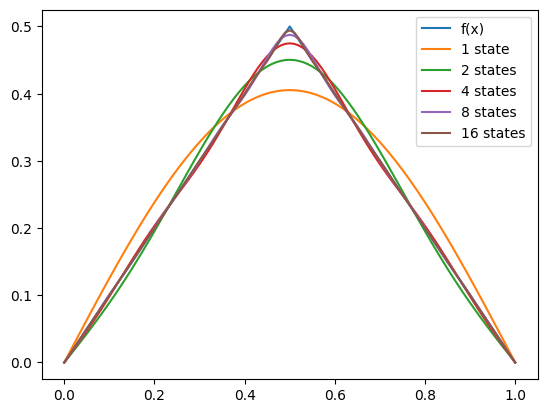

In [6]:
# range of x values
x = np.arange(0, 1.01, 0.01)

# function we are approximating
fx = np.zeros(len(x))
for i, myx in enumerate(x):
    if myx < 0.5:
        fx[i] = myx
    else :
        fx[i] = 1.0 - myx

# a list containing approximations to fx
approximate_fxn = []

# function to approximate f(x), given some maximum number of PIB states
def approximate_function(max_states, x):

    approximate_fxn = np.zeros_like(x)
    
    # max_states PIB functions (odd ones only)
    for i in range (0, max_states):
        
        # which PIB state?
        n = 2*i + 1
    
        # cn = <psi_n | fx >
        psi_n = np.sqrt(2.0) * np.sin(n * np.pi * x)
        cn = np.trapz(psi_n * fx, x=x)
    
        # add this term to approximate functions
        approximate_fxn += cn * psi_n

    return approximate_fxn

approximate_fxn_1 = approximate_function(1, x)
approximate_fxn_2 = approximate_function(2, x)
approximate_fxn_4 = approximate_function(4, x)
approximate_fxn_8 = approximate_function(8, x)
approximate_fxn_16 = approximate_function(16, x)

plt.plot(x, fx, label='f(x)')
plt.plot(x, approximate_fxn_1, label = '1 state' )
plt.plot(x, approximate_fxn_2, label = '2 states' )
plt.plot(x, approximate_fxn_4, label = '4 states' )
plt.plot(x, approximate_fxn_8, label = '8 states' )
plt.plot(x, approximate_fxn_16, label = '16 states' )
plt.legend()
plt.show()